In [88]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
import os



In [89]:
df = pd.read_csv('/kaggle/input/time-wasters-on-social-media/Time-Wasters on Social Media.csv')
df.head()

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
3,4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,...,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data


In [57]:
df.dtypes

UserID                       int64
Age                          int64
Gender                      object
Location                    object
Income                       int64
Debt                          bool
Owns Property                 bool
Profession                  object
Demographics                object
Platform                    object
Total Time Spent             int64
Number of Sessions           int64
Video ID                     int64
Video Category              object
Video Length                 int64
Engagement                   int64
Importance Score             int64
Time Spent On Video          int64
Number of Videos Watched     int64
Scroll Rate                  int64
Frequency                   object
ProductivityLoss             int64
Satisfaction                 int64
Watch Reason                object
DeviceType                  object
OS                          object
Watch Time                  object
Self Control                 int64
Addiction Level     

In [58]:
countries = df['Location'].unique()

countries_list = countries.tolist()
print("Уникальные страны в колонке 'Location':")
print(countries_list)

Уникальные страны в колонке 'Location':
['Pakistan', 'Mexico', 'United States', 'Barzil', 'Vietnam', 'India', 'Indonesia', 'Philippines', 'Japan', 'Germany']


Text(0, 0.5, 'number of people')

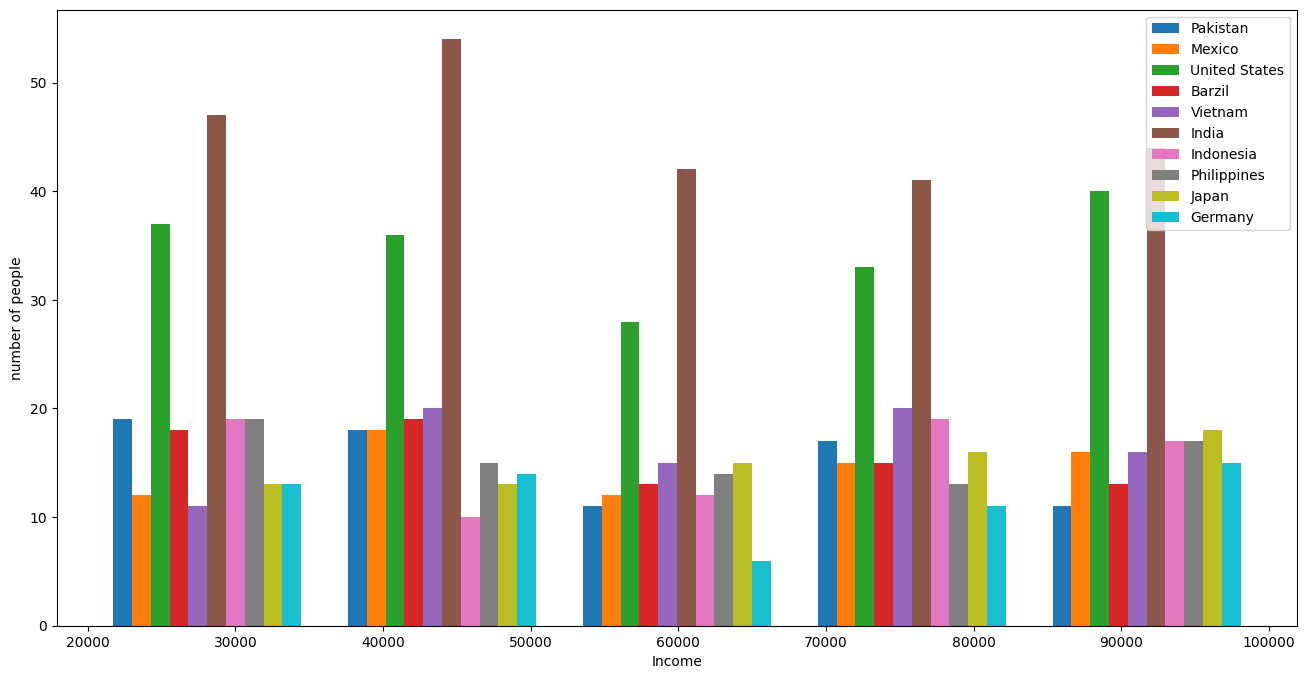

In [59]:
plt.figure(figsize = (16,8))
x = []
for i in countries_list:
    x.append(list(df[df['Location'] == i]['Income']))

# Make the histogram using a list of lists
# Normalize the flights and assign colors and names'''
bins = [0, 20000, 40000, 60000, 80000, 100000] 
plt.hist(x, bins = int(5), label=countries_list)

# Plot formatting
plt.legend()
plt.xlabel('Income')
plt.ylabel('number of people')


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

'есть вероятность, что минимально теряют продутивность люди из бразилии'

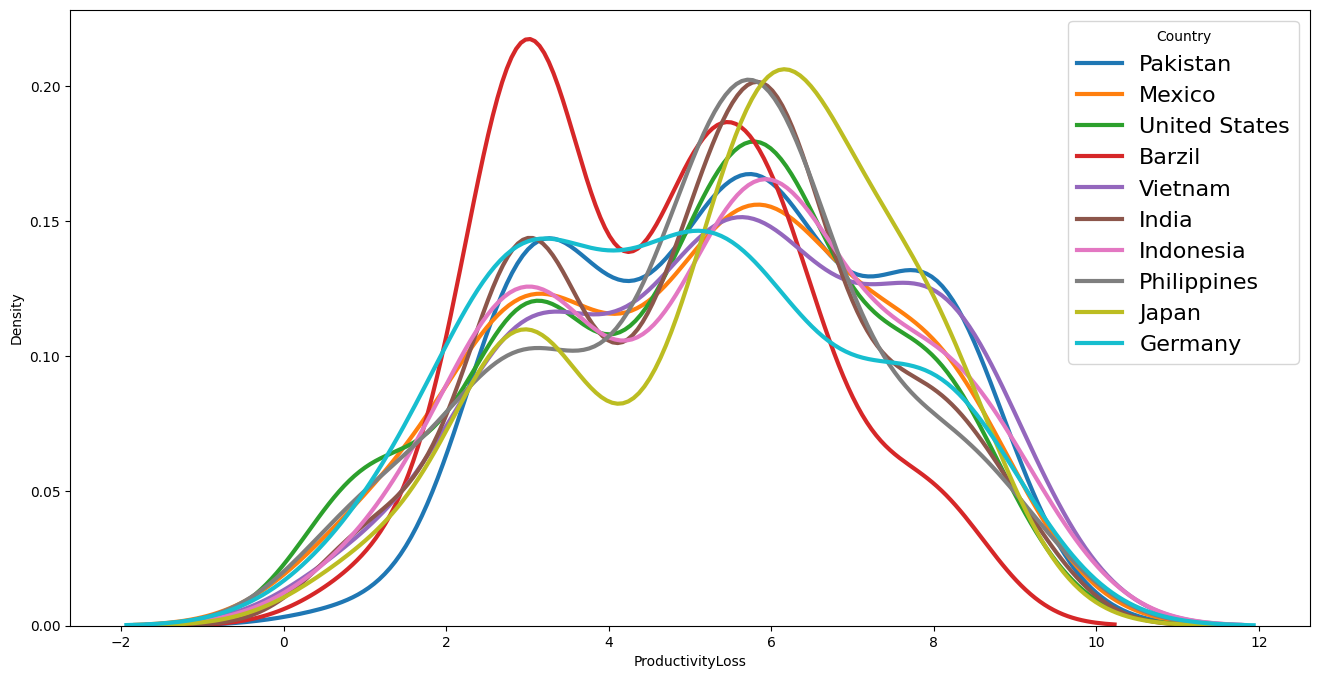

In [60]:
plt.figure(figsize = (16,8))

# Iterate through the five airlines
for country in countries_list:
    # Subset to the airline
    subset = df[df['Location'] == country]

    # Draw the density plot
    sns.kdeplot(data=subset, x='ProductivityLoss', linewidth=3, label=country)


# Plot formatting
plt.legend(prop={'size': 16}, title = 'Country')

plt.xlabel('ProductivityLoss')
plt.ylabel('Density')

'''есть вероятность, что минимально теряют продутивность люди из бразилии'''

In [61]:
for country in countries_list:
    productivity_loss = df[df['Location'] == country]['ProductivityLoss']
    
    productivity_pivot = productivity_loss.value_counts().reset_index()
    productivity_pivot.columns = ['ProductivityLoss', 'Count']
    
    total_loss = productivity_pivot['Count'].sum()
    
    productivity_pivot['Percentage'] = (productivity_pivot['Count'] / total_loss) * 100
    
    print(f"Потери продуктивности в: {country}")
    print(productivity_pivot)
    print("\n") 


'''максимальное число людей, на продутивность которых не влияют соцсети находятся в Бразилии '''

Потери продуктивности в: Pakistan
   ProductivityLoss  Count  Percentage
0                 3     19   25.000000
1                 6     18   23.684211
2                 8     17   22.368421
3                 5     11   14.473684
4                 4      5    6.578947
5                 7      3    3.947368
6                 9      2    2.631579
7                 1      1    1.315789


Потери продуктивности в: Mexico
   ProductivityLoss  Count  Percentage
0                 6     17   23.287671
1                 3     16   21.917808
2                 8     13   17.808219
3                 5     10   13.698630
4                 1      5    6.849315
5                 7      4    5.479452
6                 2      3    4.109589
7                 4      3    4.109589
8                 9      2    2.739726


Потери продуктивности в: United States
   ProductivityLoss  Count  Percentage
0                 6     42   24.137931
1                 3     34   19.540230
2                 5     27   15.5

'максимальное число людей, на продутивность которых не влияют соцсети находятся в Бразилии '

In [63]:
df.groupby('Location')['ProductivityLoss'].mean()

Location
Barzil           4.525641
Germany          4.898305
India            5.127193
Indonesia        5.285714
Japan            5.466667
Mexico           5.109589
Pakistan         5.473684
Philippines      5.102564
United States    5.028736
Vietnam          5.439024
Name: ProductivityLoss, dtype: float64

In [64]:
df.groupby('Location')['Income'].mean()

Location
Barzil           55662.076923
Germany          60478.118644
India            58865.421053
Indonesia        60864.155844
Japan            61745.480000
Mexico           61783.630137
Pakistan         56225.000000
Philippines      58688.628205
United States    60245.954023
Vietnam          61363.182927
Name: Income, dtype: float64

In [65]:
# кажется, что меньше всего теряют продуктивность люди из Бразилии (проверю по критерию Манни-Уитни)

from scipy.stats import mannwhitneyu


# Проходим по каждой стране в списке
for i, country_1 in enumerate(countries_list):
    for country_2 in countries_list[i + 1:]:  # Чтобы избежать повторных сравнений и самосравнений
        country_1_data = df[df.Location == country_1]
        country_2_data = df[df.Location == country_2]

        # Проверяем, что в обеих странах есть данные о потерях продуктивности
        if not country_1_data.empty and not country_2_data.empty:
            # Выполняем тест Манна-Уитни
            stat, p = mannwhitneyu(country_1_data.Income, country_2_data.Income)
            

            # Устанавливаем уровень значимости
            alpha = 0.1
            if p > alpha:
                #print('Не обнаружено статистически значимых различий в уровне продуктивности.\n')
                pass
            else:
                print(f"Сравнение {country_1} и {country_2}:")
                print(f'Критерий значимости = {p:.3f}')
                print('Обнаружены статистически значимые различия в уровне продуктивности:')
                print(f'{country_1}: {country_1_data.Income.mean():.2f}, '
                      f'{country_2}: {country_2_data.Income.mean():.2f}\n')
        else:
            print(f"Нет данных для одной из стран: {country_1} или {country_2}\n")

'''Сравнение Barzil и Vietnam:
Критерий значимости = 0.088
Обнаружены статистически значимые различия в уровне продуктивности:
Barzil: 55662.08, Vietnam: 61363.18

Сравнение Barzil и Japan:
Критерий значимости = 0.094
Обнаружены статистически значимые различия в уровне продуктивности:
Barzil: 55662.08, Japan: 61745.48'''

Сравнение Barzil и Vietnam:
Критерий значимости = 0.088
Обнаружены статистически значимые различия в уровне продуктивности:
Barzil: 55662.08, Vietnam: 61363.18

Сравнение Barzil и Japan:
Критерий значимости = 0.094
Обнаружены статистически значимые различия в уровне продуктивности:
Barzil: 55662.08, Japan: 61745.48



'Сравнение Barzil и Vietnam:\nКритерий значимости = 0.088\nОбнаружены статистически значимые различия в уровне продуктивности:\nBarzil: 55662.08, Vietnam: 61363.18\n\nСравнение Barzil и Japan:\nКритерий значимости = 0.094\nОбнаружены статистически значимые различия в уровне продуктивности:\nBarzil: 55662.08, Japan: 61745.48'

In [68]:
df.groupby('Location')['Income'].mean()

Location
Barzil           55662.076923
Germany          60478.118644
India            58865.421053
Indonesia        60864.155844
Japan            61745.480000
Mexico           61783.630137
Pakistan         56225.000000
Philippines      58688.628205
United States    60245.954023
Vietnam          61363.182927
Name: Income, dtype: float64

In [ ]:
# возникает мысль, что страна не влияет не сильно влияет на зп и уровень потери продуктивности 

In [69]:
df.groupby('Gender')['Income'].mean()
df.Gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [71]:
import scipy.stats as stats

men = df[df['Gender'] == 'Male']['Income']
women = df[df['Gender'] == 'Female']['Income']
other = df[df['Gender'] == 'Other']['Income']

# Выполнение однофакторного дисперсионного анализа (ANOVA)
f_statistic, p_value = stats.f_oneway(men, women, other)

# Вывод результатов
print(f'F-statistic: {f_statistic}')
print(f'p-value: {p_value}')

# Интерпретация результатов
alpha = 0.05
if p_value < alpha:
    print("Существует статистически значимое различие в уровне зарплат между группами.")
else:
    print("Нет статистически значимого различия в уровне зарплат между группами.")

F-statistic: 1.9044037102570186
p-value: 0.14945270632132818
Нет статистически значимого различия в уровне зарплат между группами.


In [122]:
df.Profession.unique()

array(['Engineer', 'Artist', 'Waiting staff', 'Manager', 'driver',
       'Students', 'Labor/Worker', 'Cashier', 'Teacher'], dtype=object)

In [74]:
import scipy.stats as stats

Instagram = df[df['Platform'] == 'Instagram']['Addiction Level']
Facebook = df[df['Platform'] == 'Facebook']['Addiction Level']
YouTube = df[df['Platform'] == 'YouTube']['Addiction Level']
TikTok = df[df['Platform'] == 'TikTok']['Addiction Level']

# Выполнение однофакторного дисперсионного анализа (ANOVA)
f_statistic, p_value = stats.f_oneway(Instagram, Facebook, YouTube, TikTok)

# Вывод результатов
print(f'F-statistic: {f_statistic}')
print(f'p-value: {p_value}')

# Интерпретация результатов
alpha = 0.05
if p_value < alpha:
    print("Существует статистически значимое различие в уровне зарплат между группами.")
else:
    print("Нет статистически значимого различия в уровне зарплат между группами.")

F-statistic: 0.46161423904926724
p-value: 0.7091543374512075
Нет статистически значимого различия в уровне зарплат между группами.


In [140]:
# поделю людей на три типа в зависимости от уровня потери продуктивности
def classify_productivity(loss):
    if loss in [1, 2, 3]:
        return 'Хорошо сконцентрированные'
    elif loss in [4, 5, 6]:
        return 'Не очень сконцентрированные'
    else:
        return 'Плохо'
   

df['ProductivityLoss'] = df['ProductivityLoss'].apply(classify_productivity)

     UserID  Age  Gender       Location  Income   Debt  Owns Property  \
0         1   56    Male       Pakistan   82812   True           True   
1         2   46  Female         Mexico   27999  False           True   
2         3   32  Female  United States   42436  False           True   
3         4   60    Male         Barzil   62963   True          False   
4         5   25    Male       Pakistan   22096  False           True   
..      ...  ...     ...            ...     ...    ...            ...   
995     996   22    Male          India   74254   True           True   
996     997   40  Female       Pakistan   27006  False          False   
997     998   27    Male          India   94218   True           True   
998     999   61    Male       Pakistan   85344   True          False   
999    1000   19    Male          India   53840   True           True   

        Profession Demographics   Platform  ...             ProductivityLoss  \
0         Engineer        Rural  Instagram 

   CurrentActivity             ProductivityLoss  Counts
0          At home  Не очень сконцентрированные     156
1          At home                        Плохо      94
2          At home    Хорошо сконцентрированные     131
3        At school  Не очень сконцентрированные     122
4        At school                        Плохо      69
5        At school    Хорошо сконцентрированные      80
6          At work  Не очень сконцентрированные     107
7          At work                        Плохо      53
8          At work    Хорошо сконцентрированные      74
9        Commuting  Не очень сконцентрированные      56
10       Commuting                        Плохо      26
11       Commuting    Хорошо сконцентрированные      32
0     40.944882
1     24.671916
2     34.383202
3     45.018450
4     25.461255
5     29.520295
6     45.726496
7     22.649573
8     31.623932
9     49.122807
10    22.807018
11    28.070175
Name: Percentage, dtype: float64


TypeError: unsupported format string passed to Series.__format__

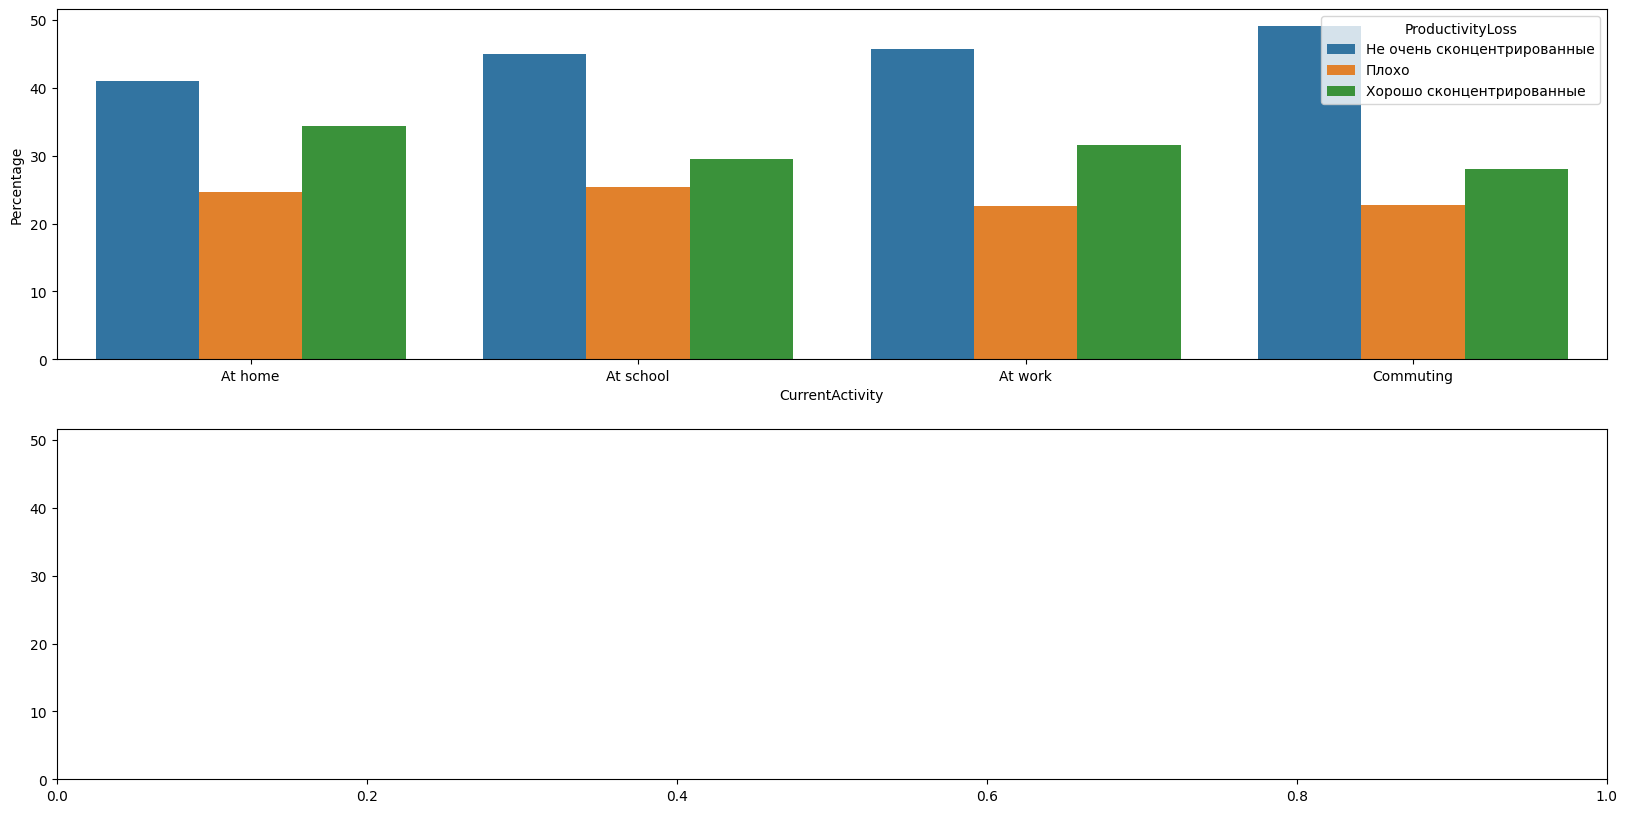

In [153]:

fig, axes = plt.subplots(2, 1, sharey=True, figsize=(20, 10))

def annotate_percentage(ax, data):
    totals = data.groupby(x_col)['Counts'].sum()
    for p in ax.patches:
        height = p.get_height()
        
        category_index = ax.patches.index(p)
       
        category = data[x_col].unique()[category_index // len(data[hue_col].unique())]
        total = totals[category]
        
        percentage = height / total * 100
        ax.annotate(f'{data.Percentage:.1f}%', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=12)


platform_counts = df.groupby(['CurrentActivity', 'ProductivityLoss']).size().reset_index(name='Counts')
print(platform_counts)
platform_counts['Percentage'] = platform_counts['Counts'] / platform_counts.groupby('CurrentActivity')['Counts'].transform('sum') * 100
print(platform_counts['Percentage'])
sns.barplot(x='CurrentActivity', y='Percentage', hue='ProductivityLoss', data=platform_counts, ax=axes[0])
annotate_percentage(axes[0], platform_counts, 'CurrentActivity', 'ProductivityLoss')

sns.barplot(x='CurrentActivity', y='Percentage', hue='ProductivityLoss', data=platform_counts, ax=axes[1])




axes[0].set_title("Процент удовлетворенности людей от платформы")
axes[1].set_title("Процент удовлетворенности людей от страны ")


plt.tight_layout()
plt.show()